# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)



### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Create a Beautiful Soup Object
html = browser.html
w_soup = soup(html, 'html.parser')


In [11]:
# Extract all rows of data
weather_headers = w_soup.find_all('th')
weather_data = w_soup.find_all('tr', class_='data-row')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [13]:
# Create an empty list
weather = []
# Loop through the scraped data to create a list of rows
for row in weather_data:
    weather.append(row.text)
weather

['\n2\n2012-08-16\n10\n155\n6\n-75.0\n739.0\n',
 '\n13\n2012-08-17\n11\n156\n6\n-76.0\n740.0\n',
 '\n24\n2012-08-18\n12\n156\n6\n-76.0\n741.0\n',
 '\n35\n2012-08-19\n13\n157\n6\n-74.0\n732.0\n',
 '\n46\n2012-08-20\n14\n157\n6\n-74.0\n740.0\n',
 '\n57\n2012-08-21\n15\n158\n6\n-78.0\n740.0\n',
 '\n68\n2012-08-22\n16\n158\n6\n-77.0\n740.0\n',
 '\n79\n2012-08-23\n17\n159\n6\n-76.0\n742.0\n',
 '\n112\n2012-08-27\n21\n161\n6\n-74.0\n741.0\n',
 '\n114\n2012-08-28\n22\n162\n6\n-74.0\n742.0\n',
 '\n123\n2012-08-29\n23\n162\n6\n-75.0\n741.0\n',
 '\n134\n2012-08-30\n24\n163\n6\n-75.0\n742.0\n',
 '\n145\n2012-08-31\n25\n163\n6\n-75.0\n743.0\n',
 '\n156\n2012-09-01\n26\n164\n6\n-76.0\n745.0\n',
 '\n163\n2012-09-02\n27\n164\n6\n-75.0\n743.0\n',
 '\n170\n2012-09-03\n28\n165\n6\n-75.0\n745.0\n',
 '\n171\n2012-09-04\n29\n166\n6\n-75.0\n747.0\n',
 '\n172\n2012-09-05\n30\n166\n6\n-74.0\n747.0\n',
 '\n173\n2012-09-06\n31\n167\n6\n-74.0\n745.0\n',
 '\n175\n2012-09-08\n33\n168\n6\n-73.0\n748.0\n',
 '\n176\n

In [17]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_list = pd.read_html(html, header=0, flavor='bs4', index_col='id')

In [15]:
weather_list

[     terrestrial_date   sol   ls  month  min_temp  pressure
 id                                                         
 2          2012-08-16    10  155      6     -75.0     739.0
 13         2012-08-17    11  156      6     -76.0     740.0
 24         2012-08-18    12  156      6     -76.0     741.0
 35         2012-08-19    13  157      6     -74.0     732.0
 46         2012-08-20    14  157      6     -74.0     740.0
 ...               ...   ...  ...    ...       ...       ...
 1889       2018-02-23  1973  133      5     -78.0     730.0
 1892       2018-02-24  1974  134      5     -77.0     729.0
 1894       2018-02-25  1975  134      5     -76.0     729.0
 1893       2018-02-26  1976  135      5     -77.0     728.0
 1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 6 columns]]

In [20]:
# Confirm DataFrame was created successfully
weather_df.head()

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [23]:
# Examine data type of each column
weather_df.dtypes

terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [24]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])

In [25]:
# Confirm type changes were successful by examining data types again
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 2 to 1895
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   terrestrial_date  1867 non-null   datetime64[ns]
 1   sol               1867 non-null   int64         
 2   ls                1867 non-null   int64         
 3   month             1867 non-null   int64         
 4   min_temp          1867 non-null   float64       
 5   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 102.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [29]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
months

12

In [30]:
# 2. How many Martian days' worth of data are there?
days_of_data = weather_df['sol'].count()
days_of_data

1867

In [36]:
# 3. What is the average low temperature by month?
avg_df_month = weather_df.groupby('month').mean()
avg_low_temp_min = avg_df_month['min_temp'].min()
avg_low_temp_max = avg_df_month['min_temp'].max()
avg_df_month['min_temp']

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Figure size 1000x5000 with 0 Axes>

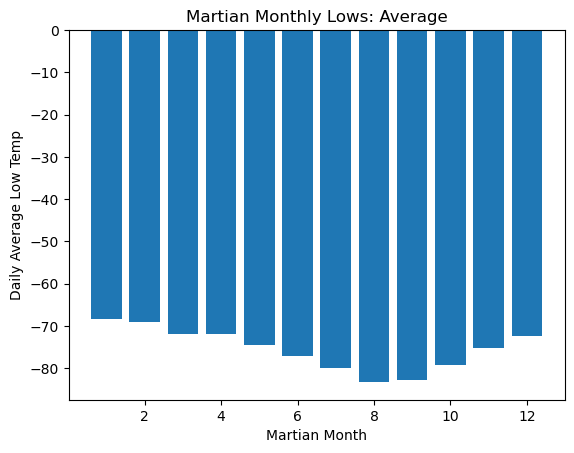

<Figure size 1000x5000 with 0 Axes>

In [50]:
# Plot the average temperature by month
x_axis = num_months
y_axis = avg_df_month['min_temp']
plt.bar(x_axis, y_axis, label='Martian Low Temps')
plt.xlabel("Martian Month")
plt.ylabel("Daily Average Low Temp")
plt.title("Martian Monthly Lows: Average")
plt.figure(figsize=(10, 50))

In [54]:
# Identify the coldest and hottest months in Curiosity's location
# get temps from the df
MinTemp = avg_df_month['min_temp'].min()
Maxtemp = avg_df_month['min_temp'].max()
# find the rows with associated data
min_temp_month = avg_df_month.loc[avg_df_month['min_temp'] == MinTemp]
max_temp_month = avg_df_month.loc[avg_df_month['min_temp'] == Maxtemp]
# show results
print(min_temp_month, max_temp_month)

              sol         ls   min_temp    pressure
month                                              
3      1204.40625  75.010417 -83.307292  877.322917               sol          ls   min_temp    pressure
month                                               
8      795.333333  224.347518 -68.382979  873.829787


In [56]:
# 4. Average pressure by Martian month
avg_pressure = weather_df.groupby(['month']).mean()
avg_month_pressure = avg_pressure['pressure']
avg_month_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Figure size 1000x5000 with 0 Axes>

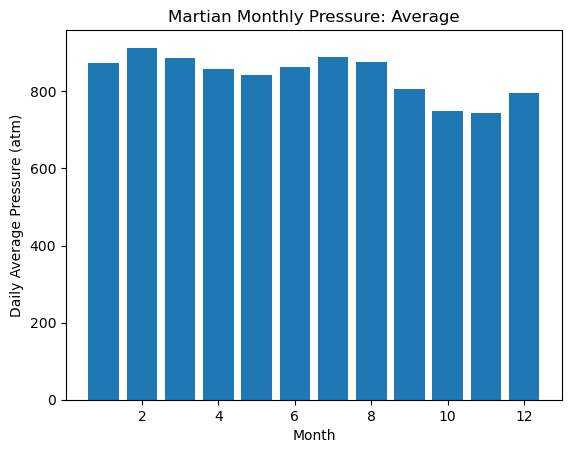

<Figure size 1000x5000 with 0 Axes>

In [58]:
# Plot the average pressure by month
x_axis = num_months
y_axis = avg_month_pressure
plt.bar(x_axis, y_axis, label='Martian Pressure')
plt.xlabel("Month")
plt.ylabel("Daily Average Pressure (atm)")
plt.title("Martian Monthly Pressure: Average")
plt.figure(figsize=(10, 50))

In [72]:
# 5. How many terrestrial (earth) days are there in a Martian year? 
# take earth days / 675 and that is how many earth days you get in an marz year
print(f'There is {days_of_data} days worth data available,\nwhich is {(days_of_data / 687):.2f} Martian Years worth of data.\ndivided, you get 686.39 days')


There is 1867 days worth data available,
which is 2.72 Martian Years worth of data.
divided, you get 686.39 days


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [70]:
# Write the data to a CSV
weather_df.to_csv('mars_weather.csv')
weather_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [71]:
browser.quit()